# Com S 574 - Homework 4
### Miles Lucas
#### *Iowa State University*

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

In [3]:
plt.style.use('seaborn-paper')

In [21]:
from sklearn.datasets import load_boston
boston_raw = load_boston()
boston = pd.DataFrame(data=boston_raw['data'])
boston.columns = boston_raw['feature_names']
boston['VALUE'] = boston_raw['target']

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VALUE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [223]:
results = pd.DataFrame(columns=['predictors', 'R2', 'AR2', 'AIC', 'BIC'])

## OLS

Let's start with ordinary least squares. I'll use all the possible predictors.

$$
 y = \beta \cdot X + \epsilon
$$

In [154]:
predictors = sm.add_constant(boston.drop('VALUE', axis=1))
ols_model = sm.OLS(boston.VALUE, predictors).fit()

/Users/miles/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Now lets do some residual analysis to make sure our assumptions are valid. A reminder of those assumptions are
1. Randomly Sampled
2. Homoscedastic erros
3. somethings else

Below I perform the Breusch-Pagan test for heteroscedasticity. In `statsmodels` the outputs are the LM statistic and p-value, then the F statistics and p-value

In [41]:
sm.stats.diagnostic.het_breuschpagan(ols_model.resid, predictors)

(65.12178613716186,
 6.265430719876314e-09,
 5.590226641705009,
 1.4957755130733234e-09)

Both p-values are significant for $\alpha$=0.05 so we reject $H_0$ that the residuals are heteroscedastic.

In [43]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        12:26:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
results.loc['OLS'] = [
    predictors.columns,
    ols_model.rsquared, 
    ols_model.rsquared_adj,
    ols_model.aic,
    ols_model.bic
]

## Subset selection

Now I will go through a few different ways of deciding the best predictors to use for linear regression.

#### Best subset selection

This will go through and pick the best predictor for each $n$ number of predictors. For selection I will use $R^2$.

In [245]:
from itertools import combinations

def best_subset_selection(X, y):
    subsets = []

    for k in range(1, len(X.columns) + 1):
        pred_combs = combinations(X.columns, k)
        r2 = []
        for pred_keys in pred_combs:
            pred = X[list(pred_keys)]
            model = sm.OLS(y, pred).fit()
            r2.append({
                'predictors': pred_keys,
                'R2': model.rsquared,
                'AR2': model.rsquared_adj,
                'AIC': model.aic,
                'BIC': model.bic,
            })
        sorted_r2 = sorted(r2, key=lambda k: k['R2'], reverse=True)
        subsets.append(sorted_r2[0])
        
    return pd.DataFrame(subsets).sort_values('BIC')

In [246]:
%time best_subset = best_subset_selection(predictors, boston.VALUE)

CPU times: user 20 s, sys: 182 ms, total: 20.1 s
Wall time: 20.2 s


In [247]:
best_subset.head()

,AIC,AR2,BIC,R2,predictors
13,3025.608594,0.733790,3084.780107,0.740643,"(const, CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, D..."
7,3076.220839,0.957482,3110.033133,0.958154,"(CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT)"
6,3080.758764,0.957015,3110.344521,0.957610,"(ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT)"
9,3069.067146,0.958241,3111.332513,0.959067,"(CRIM, ZN, CHAS, RM, DIS, RAD, TAX, PTRATIO, B..."
5,3086.430083,0.956446,3111.789303,0.956962,"(CHAS, RM, DIS, PTRATIO, B, LSTAT)"


In [248]:
best_subset_pred = predictors[list(best_subset.iloc[0]['predictors'])]
best_subset_model = sm.OLS(boston.VALUE, \
                    best_subset_pred).fit()
best_subset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        18:21:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
results.loc['Best Subset'] = [
    best_subset.iloc[0]['predictors'], 
    best_subset_model.rsquared, 
    best_subset_model.rsquared_adj, 
    best_subset_model.aic, 
    best_subset_model.bic, 
]

#### Now lets do forward selection

In [250]:
def forward_selection(X, y):
    subsets = []
    current_predictors = []
    for k in range(1, len(X.columns) + 1):
        pred_remain = X.drop(current_predictors, axis=1)
        r2 = []
        for pred_key in pred_remain:
            key = current_predictors + [pred_key]
            pred = X[key]
            model = sm.OLS(y, pred).fit()
            r2.append({
                'predictors': key,
                'R2': model.rsquared,
                'AR2': model.rsquared_adj,
                'AIC': model.aic,
                'BIC': model.bic,
            })
        sorted_r2 = sorted(r2, key=lambda k: k['R2'], reverse=True)
        subsets.append(sorted_r2[0])
        current_predictors = sorted_r2[0]['predictors']
        
    return pd.DataFrame(subsets).sort_values('BIC')

In [251]:
%time forward_models = forward_selection(predictors, boston.VALUE)

CPU times: user 167 ms, sys: 4.08 ms, total: 171 ms
Wall time: 169 ms


In [252]:
forward_models.iloc[0]

AIC                                                     3025.61
AR2                                                     0.73379
BIC                                                     3084.78
R2                                                     0.740643
predictors    [RM, LSTAT, PTRATIO, B, DIS, CHAS, ZN, CRIM, N...
Name: 13, dtype: object

In [253]:
forward_subset_pred = predictors[list(forward_models.iloc[0]['predictors'])]
forward_subset_model = sm.OLS(boston.VALUE, \
                    forward_subset_pred).fit()
forward_subset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        18:21:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.8099      0.418      9.116      0.000       2.989       4.631
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
const         36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
results.loc['Forward Selection'] = [
    forward_models.iloc[0]['predictors'], 
    forward_subset_model.rsquared, 
    forward_subset_model.rsquared_adj, 
    forward_subset_model.aic, 
    forward_subset_model.bic, 
]

#### Backward model selection

In [255]:
def backward_selection(X, y):
    subsets = []
    current_predictors = X.columns
    for k in range(len(X.columns), 1, -1):
        r2 = []
        for pred_key in current_predictors:
            key = current_predictors.drop(pred_key)
            pred = X[key]
            model = sm.OLS(y, pred).fit()
            r2.append({
                'predictors': key,
                'R2': model.rsquared,
                'AR2': model.rsquared_adj,
                'AIC': model.aic,
                'BIC': model.bic,
            })
        sorted_r2 = sorted(r2, key=lambda k: k['R2'], reverse=True)
        subsets.append(sorted_r2[0])
        current_predictors = sorted_r2[0]['predictors']
        
    return pd.DataFrame(subsets).sort_values('BIC')

In [256]:
%time backward_models = backward_selection(predictors, boston.VALUE)

CPU times: user 174 ms, sys: 2.5 ms, total: 176 ms
Wall time: 174 ms


In [257]:
backward_models.iloc[0]

AIC                                                     3080.76
AR2                                                    0.957015
BIC                                                     3110.34
R2                                                      0.95761
predictors    Index(['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', '...
Name: 6, dtype: object

In [258]:
backward_subset_pred = predictors[list(backward_models.iloc[0]['predictors'])]
backward_subset_model = sm.OLS(boston.VALUE, \
                    backward_subset_pred).fit()
backward_subset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1610.
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:21:46   Log-Likelihood:                -1533.4
No. Observations:                 506   AIC:                             3081.
Df Residuals:                     499   BIC:                             3110.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0382      0.014      2.761      0.006       0.011       0.065
CHAS           2.9719      0.902      3.296      0.001       1.200       4.744
RM             5.5923      0.245     22.785      0.000       5.110       6.075
DIS           -0.6822      0.155     -4.409      0.000      -0.986      -0.378
PTRATIO       -0.5343      0.096     -5.539      0.000      -0.724      -0.345
B              0.0157      0.003      6.214      0.000       0.011       0.021
LSTAT         -0.5095      0.040    -12.623      0.000      -0.589      -0.430
==============================================================================
Omnibus:                      173.713   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.794
Skew:                           1.386   Prob(JB):                    1.06e-213
Kurtosis:                       9.231   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [259]:
results.loc['Backward Selection'] = [
    backward_models.iloc[0]['predictors'], 
    backward_subset_model.rsquared, 
    backward_subset_model.rsquared_adj, 
    backward_subset_model.aic, 
    backward_subset_model.bic, 
]

#### Lasso regression

In [289]:
from scipy.optimize import minimize_scalar
def lasso_fit(X, y):
    def test_fit(alpha):
        lasso_model = sm.OLS(y, X).fit_regularized(
            alpha=alpha,
            L1_wt=1,
            refit=True
        )
        return lasso_model.bic
    
    soln = minimize_scalar(test_fit)
    final_model = sm.OLS(y, X).fit_regularized(
            alpha=soln.x,
            L1_wt=1,
            refit=True
        )
    return final_model

In [290]:
%time lasso_model = lasso_fit(predictors, boston.VALUE)

CPU times: user 4.26 s, sys: 5.85 ms, total: 4.27 s
Wall time: 4.27 s


In [291]:
lasso_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          3.68e-134
Time:                        19:26:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3028.
Df Residuals:                     492   BIC:                             3091.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [292]:
results.loc['Lasso'] = [
    lasso_model.model.exog_names, 
    lasso_model.rsquared, 
    lasso_model.rsquared_adj, 
    lasso_model.aic, 
    lasso_model.bic, 
]

#### Ridge Regression

In [320]:
def ridge_fit(X, y):
    def test_fit(alpha):
        model = sm.OLS(y, X).fit_regularized(
            alpha=alpha,
            L1_wt=0,
            refit=True
        ).model.fit()
        return model.bic
    
    soln = minimize_scalar(test_fit)
    final_model = sm.OLS(y, X).fit_regularized(
            alpha=soln.x,
            L1_wt=0,
            refit=True
        ).model.fit()
    return final_model

In [321]:
%time ridge_model = ridge_fit(predictors, boston.VALUE)

CPU times: user 41.6 ms, sys: 1.9 ms, total: 43.5 ms
Wall time: 41.9 ms


In [322]:
ridge_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        19:36:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [323]:
results.loc['Ridge'] = [
    ridge_model.model.exog_names, 
    ridge_model.rsquared, 
    ridge_model.rsquared_adj, 
    ridge_model.aic, 
    ridge_model.bic, 
]

#### PCR

In [342]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

normalized_predictors = scale(predictors)

pca = PCA(n_components=0.95)
new_features = pca.fit_transform(normalized_predictors)

pcr_model = sm.OLS(boston.VALUE, new_features).fit()

In [343]:
pcr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.84e-08
Time:                        19:54:02   Log-Likelihood:                -2306.2
No. Observations:                 506   AIC:                             4630.
Df Residuals:                     497   BIC:                             4669.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2708      0.418     -5.430      0.000      -3.092      -1.449
x2             2.1927      0.865      2.536      0.012       0.494       3.892
x3             3.4975      0.929      3.766      0.000       1.673       5.322
x4            -1.0796      1.118     -0.966      0.335      -3.276       1.117
x5            -2.2309      1.133     -1.969      0.050      -4.457      -0.005
x6            -0.6700      1.277     -0.525      0.600      -3.178       1.838
x7            -0.0942      1.415     -0.067      0.947      -2.874       2.685
x8             1.0392      1.645      0.632      0.528      -2.192       4.271
x9             0.1493      1.967      0.076      0.940      -3.715       4.014
==============================================================================
Omnibus:                      224.620   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.869
Skew:                           1.814   Prob(JB):                         0.00
Kurtosis:                      10.608   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
results.loc['PCR'] = [
    pcr_model.model.exog_names, 
    pcr_model.rsquared, 
    pcr_model.rsquared_adj, 
    pcr_model.aic, 
    pcr_model.bic, 
]

## Analyzing the models

In [346]:
results.sort_values('BIC', inplace=True)
results

,predictors,R2,AR2,AIC,BIC
OLS,"Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS',...",0.740643,0.733790,3025.608594,3084.780107
Best Subset,"(const, CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, D...",0.740643,0.733790,3025.608594,3084.780107
Ridge,"[const, CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, D...",0.740643,0.733790,3025.608594,3084.780107
Forward Selection,"[RM, LSTAT, PTRATIO, B, DIS, CHAS, ZN, CRIM, N...",0.740643,0.733790,3025.608594,3084.780107
Lasso,"[const, CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, D...",0.740643,0.733790,3027.608594,3091.006644
Backward Selection,"Index(['ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', '...",0.957610,0.957015,3080.758764,3110.344521
PCR,"[x1, x2, x3, x4, x5, x6, x7, x8, x9]",0.100604,0.084317,4630.493523,4668.532353


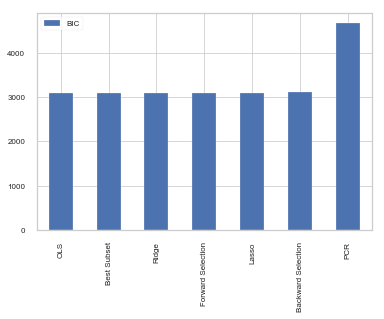

In [351]:
results.plot.bar(y='BIC')

It looks like almost all of the models I tried end up with the same BIC, so I really can choose any of them. I enjoy the thoroughness of best subset selection, so what I will do is take the predictors from best subset but I will remove any that are not statistically significant from the output. 

In [358]:
preds = predictors[list(results.loc['Best Subset', 'predictors'])]
model = sm.OLS(boston.VALUE, preds).fit()
model.pvalues[model.pvalues > 0.05]

INDUS    0.738288
AGE      0.958229
dtype: float64

In [359]:
final_preds = preds.drop(['INDUS', 'AGE'], axis=1)
final_model = sm.OLS(boston.VALUE, final_preds).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          5.54e-137
Time:                        20:24:47   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 2

### a)
$$
y_i = \beta_0 + \sum_{i=1}^N{\beta_i X_i} + \epsilon_i
$$

$$
\hat{y}_i\left(\hat{\beta} \right) = \hat{\beta}_0 + \sum_{i=1}^N{\hat{\beta}_i X_i}
$$
$$
\epsilon_i \sim \mathcal{N}\left( 0, \sigma^2_e \right)
$$


\begin{align}
\mathcal{L} \left(\hat{y} | \beta \right) &= \prod_i^N{p(\hat{y}_i | \beta)} \\
&= \prod_i^N{\frac{1}{\sqrt{2\pi\sigma_e^2}} \exp{\left[
-\frac12 \frac{\left(\hat{y}_i - y_i \right)^2}{\sigma_e^2}
\right]}} \\
&= \frac{1}{\left( 2\pi\sigma^2_e \right)^{N/2}} \exp{\left[
-\frac{1}{2\sigma^2_e}\sum_i^N{\left(\hat{y}_i - y_i \right)^2}
\right]} \\
\ln{\mathcal{L}} \left(\hat{y} | \beta \right) &= -\frac{N}{2} \ln{\left(2\pi \sigma^2_e \right)} - \frac{1}{2\sigma^2_e}\sum_i^N{\left(\hat{y}_i - y_i \right)^2}
\end{align}

we toss out anything that is not dependent on $\beta$

$$
\ln{\mathcal{L}} \left(\hat{y} | \beta \right) = \sum_i^N{\left(\hat{y}_i - y_i \right)^2}
$$